# Project
*Team #1 - Connie Dunlap, Ryne Krueger, Jackson Robbins, Wyatt Tauber*

*CSEC-520/620 Cyber Analytics & Machine Learning*

## Prerequisites

This notebook requires the following packages:
* TBD

The following files and folder should be in the same directory as this notebook:
* TBD

## 1 Data Selection & Processing

Process the data from raw executable files into useable features for our selected ML models. See the project PDF for details.

In [1]:
"""
1.2 Feature Extraction
Author: Wyatt Tauber

Convert the raw executable files into sha256_hash,packer,entropy lists
"""
import os
import subprocess

# the feature lists
packed_data = []
unpacked_data = []

# loop through each packer directory and process the files
for dir in os.listdir():
    if '.' not in dir:
        for file in os.listdir(dir):
            # call radare2 to calcualte entropy and store the result
            command = "rahash2 -a entropy"
            string = dir + "/" + file
            proc = subprocess.Popen([command + " " + string], stdout=subprocess.PIPE, shell=True)
            (out, err) = proc.communicate()

            # get the hash and entropy of the file
            file_info = out.decode().strip().split()
            
            file_hash = file_info[0].split("/")[-1][0:-1]
            file_entropy = file_info[-1]
            
            # place the file information in the appropriate list
            if 'unpacked' in file_hash:
                file_hash = file_hash.split('_')[-1]
                file_packer = "none"
                datapoint = [file_hash,file_packer,file_entropy]
                unpacked_data.append(datapoint)
            else:
                file_packer = dir
                datapoint = [file_hash,file_packer,file_entropy]
                packed_data.append(datapoint)

In [2]:
"""
1.3 Dataset Cleaning
Author: Jackson Robbins, Wyatt Tauber

Convert the lists into numeric values supported by Numpy
"""
from sklearn.model_selection import train_test_split
import numpy as np

# create train/test splits of all of the data
total_data = packed_data + unpacked_data
train_set, test_set = train_test_split(total_data, test_size=0.2)

# create the label and data lists for the splits
train_label = []
test_label = []
train_data = []
test_data = []

for data in train_set:
    #  store the training labels
    if data[1] == "none":
        train_label.append(0)
    else:
        train_label.append(1)
        
    # store the training data
    train_data.append(float(data[2]))
   
for data in test_set:
    # store the testing labels 
    if data[1] == "none":
        test_label.append(0)
    else:
        test_label.append(1)
        
    # store the testing data
    test_data.append(float(data[2]))
    
# convert the data to Numpy arrays
train_label = np.asarray(train_label)
test_label = np.asarray(test_label)
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

## 2 Experiments & Results

Implement various ML models, tune hyperparameters, and present metrics. See the project PDF for details.

## 2.1 Logistic Regression

In [3]:
"""
2.1 Logistic Regression
Author: Jackson Robbins, Wyatt Tauber

An sklearn logistic regression implementation
"""
from sklearn.linear_model import LogisticRegression

# reshape the data into 2 dimensions
logistic_train_data = train_data.reshape(-1,1)
logistic_test_data = test_data.reshape(-1,1)


# perform logistic regression on the train data
# TODO: "hyperparameter" tuning? plots?
logisticRegr = LogisticRegression()
logisticRegr.fit(logistic_train_data, train_label)

# make predictions on the test data
score = logisticRegr.score(logistic_test_data, test_label)

# print the metrics
# TODO: more metrics? plots?
print("accuracy:",score)

accuracy: 0.8985507246376812


## 2.2 Linear SVM

In [4]:
"""
2.2 Linear SVM
Author: Jackson Robbins, Wyatt Tauber

A sklearn linear SVM implementation
"""
from sklearn.svm import SVC

# reshape the data into 2 dimensions
svm_train_data = train_data.reshape(-1,1)
svm_test_data = test_data.reshape(-1,1)

# run linear SVM on the train data
clf = SVC(kernel='linear')
clf.fit(svm_train_data, train_label)

# make predictions on the test data
# TODO: hyperparameter tuning? plots?
svm_score = clf.score(svm_test_data,test_label)

# print the metrics
# TODO: more metrics? plots?
print("accuracy:",svm_score)

accuracy: 0.8985507246376812


## 2.3 k-Means

[1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0]


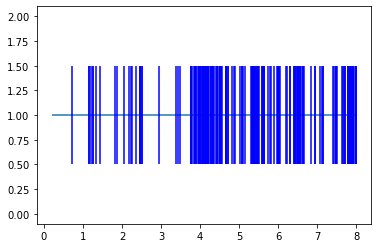

In [5]:
"""
2.3 k-Means
Author: Jackson Robbins, Wyatt Tauber

A sklearn k-Means implementation
# TODO: finish!
"""
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km_train_data = train_data.reshape(-1,1)
km_test_data = test_data.reshape(-1,1)

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04
)

y_km = km.fit_predict(km_train_data)#, train_label)
#kmeans_score = km.score(km_test_data, test_label)
print(y_km)
#print(km_train_data)

"""
plt.scatter(
    km_train_data[y_km == 0, 0], km_train_data[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    km_train_data[y_km == 1, 0], km_train_data[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()
"""

plt.figure()
#a = [1,2,5,6,9,11,15,17,18]
plt.hlines(1,0.2,8)  # Draw a horizontal line
plt.eventplot(train_data, orientation='horizontal', colors='b')
plt.show()

#print("accuracy:",kmeans_score)